In [1]:
%matplotlib inline
from sympy import *
init_printing(use_unicode=True)

In [2]:
r, u, v, c, r_c, u_c, v_c, E, p, r_p, u_p, v_p, e, a, b, q, b_0, b_1, b_2, b_3, q_0, q_1, q_2, q_3, q_4, q_5, t, g, c_0, c_1, c_2, c_3, c_4, c_5 = symbols('r u v c r_c u_c v_c E p r_p u_p v_p e a b q b_0 b_1 b_2 b_3 q_0 q_1 q_2 q_3 q_4 q_5 t g c_0 c_1 c_2 c_3 c_4 c_5',positive=True)

In [3]:
cprm, thetaprm, Pprm, betaprm, rtheta, gammaprm, rhoprm, Eprm, sigmaprm = symbols('cprm thetaprm Pprm betaprm r_theta gammaprm rhoprm Eprm sigmaprm',positive=True)

In [4]:
gamma,r_p,u_p,e = symbols('gamma r_p u_p e',positive=True)

####$f_{2}(c,p) = \dfrac{1}{2}r_{c}c^{2}+\dfrac{1}{4}u_{c}c^{4}+\dfrac{1}{6}v_{c}c^{6}+\dfrac{1}{2}r_{p}p^{2}+\dfrac{1}{4}u_{p}p^{4}-\gamma cp-\dfrac{1}{2}ec^{2}p^{2}-Ep$

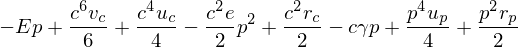

In [5]:
f2 = ((1/2)*r_c*c**2+(1/4)*u_c*c**4+(1/6)*v_c*c**6+(1/2)*r_p*p**2+(1/4)*u_p*p**4-E*p-gamma*c*p-e*c**2*p**2/2)
nsimplify(f2)

###Rescaling

In [5]:
P, C, w, rho, beta, tau, Epr = symbols('P C w rho beta tau E^{\prime}')

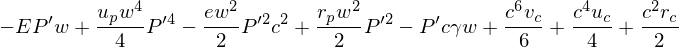

In [7]:
fP = nsimplify(f2.subs(p,w*Pprm))
fP

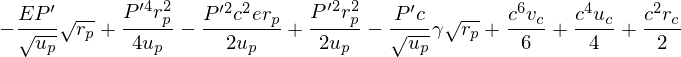

In [8]:
fP = nsimplify(fP.subs(w,sqrt(r_p/u_p)))
fP

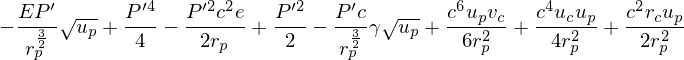

In [9]:
fP = expand(fP/(r_p**2/u_p),r_p)
fP

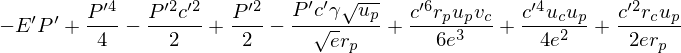

In [10]:
fP = fP.subs([(E,Epr/sqrt(u_p)*r_p**(3/2)),(c,cprm*sqrt(r_p/e))])
fP

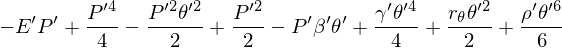

In [11]:
fP = fP.subs([(cprm,thetaprm),(r_c,rtheta*e*r_p/u_p),(u_c,gammaprm*e**2/u_p),(v_c,rhoprm*e**3/(u_p*r_p)),(gamma,betaprm*r_p*sqrt(e/u_p))])
fP

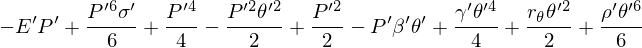

In [6]:
fhelp = nsimplify((1/2)*rtheta*thetaprm**2+(1/4)*gammaprm*thetaprm**4+(1/6)*rhoprm*thetaprm**6+(1/2)*Pprm**2+(1/4)*Pprm**4
        +(1/6)*sigmaprm*Pprm**6-betaprm*thetaprm*Pprm-(1/2)*Pprm**2*thetaprm**2-Eprm*Pprm)
fhelp

In [13]:
Ep = solve(fhelp.diff(Pprm),Eprm)[0]
Ep

In [14]:
fhelp.diff(thetaprm)

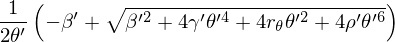

In [15]:
P_min = solve(fhelp.diff(thetaprm),Pprm)[0]
P_min

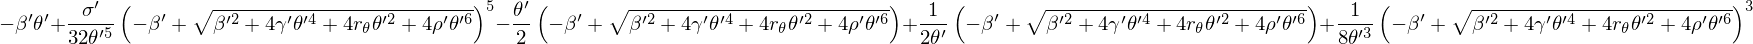

In [16]:
Ep = Ep.subs(Pprm,P_min)
Ep

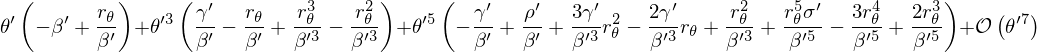

In [17]:
series(Ep,thetaprm,n=7)

In [62]:
# Series expansion of $E$ out to $\mathcal{O(\theta^{\prime 7})}$:

# $\beta E = \theta^{\prime}\left(-\beta^{\prime 2} + r_{\theta}^{\prime}\right) + \theta^{\prime 3}\left(\gamma^{\prime} - r_{\theta}^{\prime} + \dfrac{r_{\theta}^{\prime 3}}{\beta^{\prime 2}} - \dfrac{r_{\theta}^{\prime 2}}{\beta^{\prime 2}}\right) + \theta^{\prime 5}\left(-\gamma^{\prime} + \rho^{\prime} + \dfrac{3\gamma^{\prime}r_{\theta}^{\prime 2}}{\beta^{\prime 2}} - \dfrac{2\gamma^{\prime}r_{\theta}}{\beta^{\prime 2}} + \dfrac{r_{\theta}^{\prime 2}}{\beta^{\prime 2}} - \dfrac{3r_{\theta}^{\prime 4}}{\beta^{\prime 4}} + \dfrac{2r_{\theta}^{\prime 3}}{\beta^{\prime 4}}\right)$

# The coefficients of $E$ i.t.o. $a$ where $r_{\theta}^{\prime} = \beta^{\prime 2} + a$:

# $B(a) = \dfrac{a^{3}}{\beta^{\prime 2}} + a^{2}\left(3 - \dfrac{1}{\beta^{\prime 2}}\right) + a(3\beta^{\prime 2} - 3) + \beta^{\prime 4} - 2\beta^{\prime 2} + \gamma^{\prime}$

# $C(a) = -\dfrac{3a^{4}}{\beta^{\prime 4}} + a^{3}\left(\dfrac{2}{\beta^{\prime 4}} - \dfrac{12}{\beta^{\prime 2}}\right) + a^{2}\left(\dfrac{3\gamma^{\prime}}{\beta^{\prime 2}} - 18 + \dfrac{7}{\beta^{\prime 2}}\right) + a\left(6\gamma^{\prime} - 12\beta^{\prime 2} - \dfrac{2\gamma^{\prime}}{\beta^{\prime 2}} + 8\right) - 3\beta^{\prime 4} + 3\beta^{\prime 2}\gamma^{\prime} + 3\beta^{\prime 2} - 3\gamma^{\prime} + \rho^{\prime}$

# $R(a) = B(a)^{2} - \dfrac{20aC(a)}{9}$ (not going to write this one out, it's long)

In [5]:
rth = betaprm**2+a*betaprm

B = (gammaprm-rtheta+(rtheta**3-rtheta**2)/betaprm**2)/betaprm

C = (-gammaprm+rhoprm+3*gammaprm*(rtheta/betaprm)**2-2*gammaprm*rtheta/betaprm**2
     +(rtheta/betaprm)**2+rtheta**5*sigmaprm/betaprm**4-3*(rtheta/betaprm)**4+2*rtheta**3/betaprm**4)/betaprm

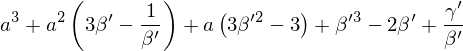

In [6]:
B = collect(expand(B.subs(rtheta,rth)),a)
B

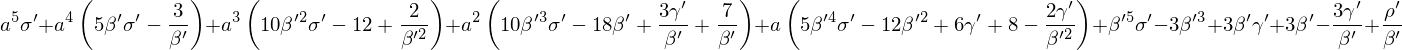

In [7]:
C = collect(expand(C.subs(rtheta,rth)),a)
C

In [8]:
b0 = betaprm**3-2*betaprm+gammaprm/betaprm
b1 = 3*betaprm**2-3
b2 = 3*betaprm-1/betaprm
b3 = 1

c0 = betaprm**5*sigmaprm-3*betaprm**3+3*betaprm*gammaprm+3*betaprm-3*gammaprm/betaprm+rhoprm/betaprm
c1 = 5*betaprm**4*sigmaprm+6*gammaprm-12*betaprm**2+8-2*gammaprm/betaprm**2
c2 = 10*betaprm**3*sigmaprm+(3*gammaprm+7)/betaprm-18*betaprm
c3 = 10*betaprm**2*sigmaprm-12+2/betaprm**2
c4 = 5*betaprm*sigmaprm-3/betaprm
c5 = sigmaprm

In [9]:
gammap = expand(solve(b0-b_0,gammaprm)[0])
sigmap = expand(solve(c0-c_0,sigmaprm)[0])

In [10]:
replacements = [(gammaprm,gammap),(sigmaprm,sigmap)]

In [11]:
sigmap = simplify(sigmap.subs(gammaprm,gammap))

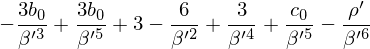

In [12]:
sigmap

In [13]:
gammap

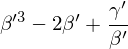

In [14]:
b0

In [15]:
b1

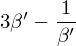

In [16]:
b2

In [17]:
b3

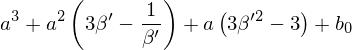

In [18]:
B_a = b3*a**3+b2*a**2+b1*a+b_0
B_a

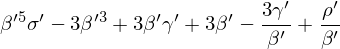

In [19]:
# c0 = c0.subs(sigmaprm,sigmap).subs(gammaprm,gammap)
c0

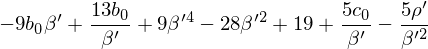

In [20]:
c1 = c1.subs(sigmaprm,sigmap).subs(gammaprm,gammap)
expand(c1)

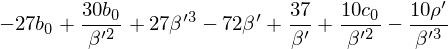

In [21]:
c2 = c2.subs(sigmaprm,sigmap).subs(gammaprm,gammap)
expand(c2)

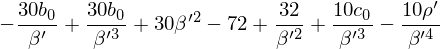

In [22]:
c3 = c3.subs(sigmaprm,sigmap).subs(gammaprm,gammap)
expand(c3)

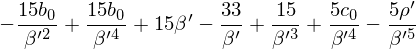

In [23]:
c4 = c4.subs(sigmaprm,sigmap).subs(gammaprm,gammap)
expand(c4)

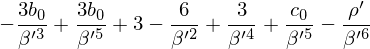

In [26]:
c5 = c5.subs(sigmaprm,sigmap).subs(gammaprm,gammap)
c5

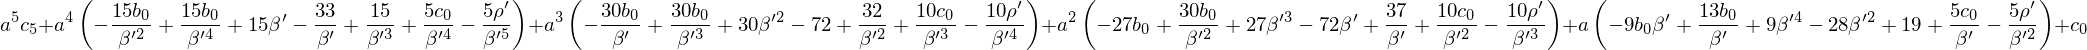

In [24]:
C_a = c_5*a**5+c4*a**4+c3*a**3+c2*a**2+c1*a+c_0
collect(expand(C_a),a)

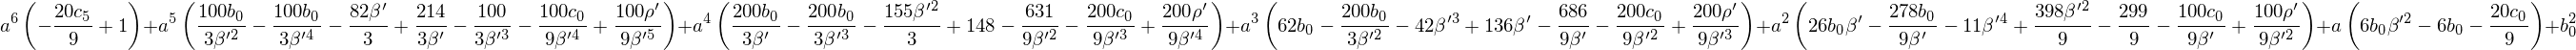

In [25]:
series(B_a**2-20*a*C_a/9,a,n=7)

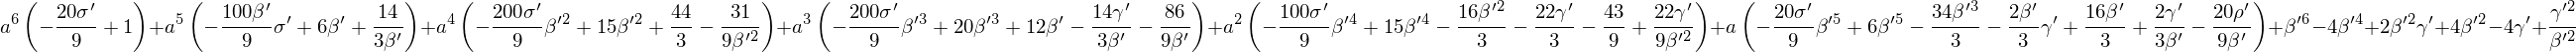

In [30]:
series(B**2-20*a*C/9,a,n=7)

In [26]:
Etrun = a*thetaprm+b*thetaprm**3+c*thetaprm**5
Etrun

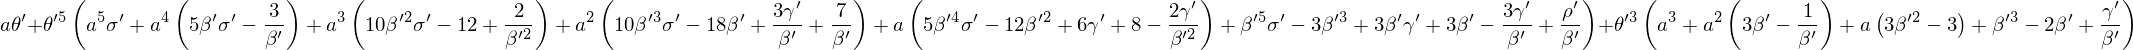

In [27]:
collect(Etrun.subs([(b,B),(c,C)]),thetaprm)

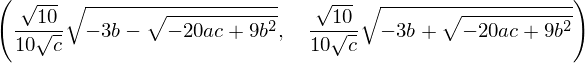

In [28]:
theta_L = solve(Etrun.diff(thetaprm),thetaprm)[1]
theta_U = solve(Etrun.diff(thetaprm),thetaprm)[3]
theta_L,theta_U

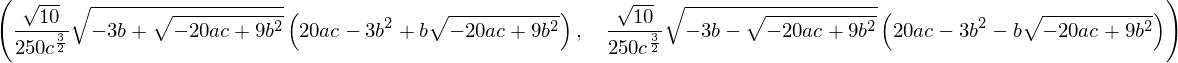

In [29]:
E_L = simplify(Etrun.subs(thetaprm,theta_U))
E_U = simplify(Etrun.subs(thetaprm,theta_L))
E_L,E_U